In [1]:
import pandas as pd

In [2]:
import numpy as np

In [ ]:

# Load dataset
data = pd.read_csv('data/cleaned_recipes_.csv')
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

scaled_data = data.copy()
# Features for similarity
features = [
    'RecipeCategory', 'RecipeIngredientParts',
    'Calories', 'FatContent', 'SaturatedFatContent',
    'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
    'FiberContent', 'SugarContent', 'ProteinContent'
]

# Extract only the relevant features
scaled_data = scaled_data[features]

# Preprocessing
# 1. Numerical Features: Standardize
# 2. Categorical Features: One-Hot Encode
numerical_features = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent'
]
categorical_features = ['RecipeCategory', 'RecipeIngredientParts']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ]
)

# Apply preprocessing
processed_data = preprocessor.fit_transform(scaled_data)
processed_data

<334580x320966 sparse matrix of type '<class 'numpy.float64'>'
	with 3680380 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.neighbors import NearestNeighbors

# Train the k-Nearest Neighbors model
model_knn = NearestNeighbors(metric='cosine', n_neighbors=10)
model_knn.fit(processed_data)

print("Model Training Completed.")


Model Training Completed.


In [11]:
def find_similar_recipes(recipe_id, data, knn_model, preprocessor, n_neighbors=10):
    """
    Find similar recipes to a given recipe.

    Args:
        recipe_id (int): Index of the recipe to find similar recipes for.
        data (DataFrame): Original dataset.
        knn_model (NearestNeighbors): Trained KNN model.
        preprocessor (ColumnTransformer): Preprocessing pipeline.
        n_neighbors (int): Number of similar recipes to return.

    Returns:
        DataFrame: Similar recipes with their distances.
    """
    # Preprocess the recipe features
    recipe_features = preprocessor.transform(data.iloc[[recipe_id]])
    
    # Find nearest neighbors
    distances, indices = knn_model.kneighbors(recipe_features, n_neighbors=n_neighbors)
    
    # Retrieve similar recipes
    similar_recipes = data.iloc[indices[0]].copy()
    similar_recipes['Distance'] = distances[0]
    
    return similar_recipes

# Example: Find similar recipes to the first recipe in the dataset
recipe_id = 0
similar_recipes = find_similar_recipes(recipe_id, data, model_knn, preprocessor, n_neighbors=10)

print("\nSimilar Recipes:")
similar_recipes



Similar Recipes:


,RecipeId,Name,CookTime,RecipeServings,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,FatContent,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,HealthStatus,MealType,Distance
0,38,Low-Fat Berry Blue Frozen Dessert,1 day,4.0,Frozen Desserts,"['4', '1/4', '1', '1']","blueberries, granulated sugar, vanilla yogurt,...",4.500000,170.9,2.5,...,8.0,29.8,37.1,3.6,30.2,3.2,"['Toss 2 cups berries with sugar.', 'Let stand...",Unhealthy,Breakfast,0.000000
191326,319715,Cranberry Chambord Sorbet,15 minutes,6.0,Frozen Desserts,[],"fresh cranberries, water, sugar, cranberries",4.632096,157.0,0.1,...,0.0,2.8,40.7,2.8,35.8,0.2,"['Combine cranberries, water and sugar in a sa...",Unhealthy,Breakfast,0.161333
174313,293148,Fabulous Rhubarb Meringue Ice Cream,5 minutes,4.0,Frozen Desserts,"['450', '125', '450', '200', '1', '2']","rhubarb, caster sugar, mascarpone, custard, or...",4.632096,169.6,0.3,...,0.0,5.3,42.5,3.8,32.5,1.5,['Put the rhubarb in a pan with the sugar & he...,Unhealthy,Breakfast,0.162583
264780,435288,Instant Fruit Sorbet,unknown,4.0,Frozen Desserts,"['3', '1/2', '1/2', '1/2', '1']","raspberries, granulated sugar, water, lemon rind",4.632096,148.6,0.4,...,0.0,1.3,37.6,2.7,35.1,1.2,['Freeze peach slices and raspberries in a sin...,Unhealthy,Breakfast,0.162799
122924,211940,Mango Sherbet,2 hours,6.0,Frozen Desserts,"['9', '1 1/2', '1/3', '1/2', '1']","navel oranges, mangoes, sugar, plain nonfat yo...",4.632096,149.4,0.4,...,0.4,18.4,37.4,3.0,33.1,2.1,['Fruit can be frozen and wrapped in plastic w...,Unhealthy,Breakfast,0.163026
307918,502985,Pineapple-Coconut Sorbet,1 hour,8.0,Frozen Desserts,"['1/2', '1/2', '3', '1', '2']","light coconut milk, sugar, fresh ginger, fresh...",5.000000,148.6,0.2,...,0.0,2.2,38.8,2.8,32.1,1.1,"['Combine coconut milk, sugar and ginger in a ...",Unhealthy,Breakfast,0.163994
136379,233234,Pear Sorbet,5 hours,6.0,Frozen Desserts,"['3', '3/4', '1/2', '1/2', '3', '1', '1']","pears, water, lemon juice, granulated sugar, l...",5.000000,145.8,0.1,...,0.0,4.4,38.1,2.7,32.0,0.4,"['In a large saucepan, bring the pears, water,...",Unhealthy,Breakfast,0.164293
274961,451829,Limoncello Mint Sorbet With Fresh Blackberries,10 minutes,8.0,Frozen Desserts,[],"water, sugar, lemon juice, mint, blackberries,...",4.632096,153.7,0.3,...,0.0,4.5,39.4,2.4,35.8,0.8,['Combine first 3 ingredients in a saucepan ov...,Unhealthy,Breakfast,0.165460
291436,477927,Grapefruit Sorbet,30 minutes,8.0,Frozen Desserts,"['5', '1', '1/4']","red grapefruits, sugar",4.632096,167.3,0.2,...,0.0,0.6,41.6,2.5,35.6,1.2,['Could also use 4 Large grapefruit -- Marsh R...,Unhealthy,Breakfast,0.166329
40472,75486,Award Berry Sorbet,6 hours,6.0,Frozen Desserts,[],"water, sugar, blackberry, raspberries, fresh b...",4.632096,179.1,0.5,...,0.0,2.5,44.9,3.0,40.8,0.9,"['In a medium saucepan bring water, sugar, and...",Unhealthy,Breakfast,0.166641


In [12]:
query_index = 1  # Index of the recipe you want to evaluate
distances, indices = model_knn.kneighbors(processed_data[query_index])

average_distance = np.mean(distances)
print(f"Average distance for query recipe {query_index}: {average_distance:.5f}")

Average distance for query recipe 1: 0.04410


In [13]:
threshold = 0.2  # Cosine distance threshold for similarity

# Count how many neighbors are considered similar
similar_neighbors = np.sum(distances < threshold)
print(f"Number of similar neighbors (distance < {threshold}): {similar_neighbors}")

Number of similar neighbors (distance < 0.2): 10


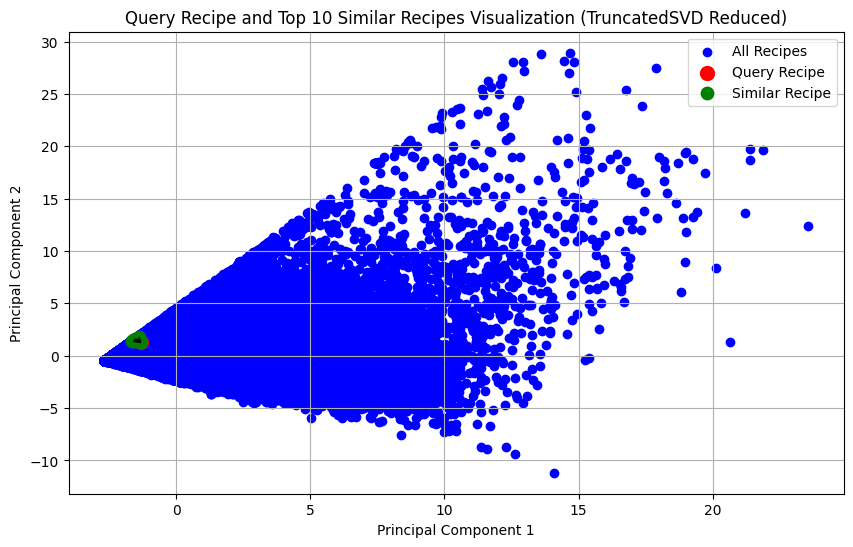

In [15]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Use TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(processed_data)

# Find nearest neighbors for visualization
query_index = 0  # Example query index (replace with the index of your query recipe)
distances, indices = model_knn.kneighbors(processed_data[query_index].reshape(1, -1), n_neighbors=10)

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color='blue', label='All Recipes')

# Highlight the query recipe
plt.scatter(reduced_data[query_index, 0], reduced_data[query_index, 1], color='red', label='Query Recipe', s=100)

# Plot top 10 similar recipes (neighbors)
for neighbor_idx in indices[0]:
    plt.scatter(reduced_data[neighbor_idx, 0], reduced_data[neighbor_idx, 1], color='green', label='Similar Recipe' if neighbor_idx == indices[0][0] else "", s=80)

# Add lines connecting the query recipe to its nearest neighbors
for neighbor_idx in indices[0]:
    plt.plot(
        [reduced_data[query_index, 0], reduced_data[neighbor_idx, 0]],
        [reduced_data[query_index, 1], reduced_data[neighbor_idx, 1]],
        'k--', alpha=0.6  # Dashed lines for connections
    )

# Add graph details
plt.title('Query Recipe and Top 10 Similar Recipes Visualization (TruncatedSVD Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [16]:
import joblib

joblib.dump(model_knn, 'knn_unsupervised_model_.pkl')
joblib.dump(preprocessor, 'unsupervised_preprossesor_.pkl')


['unsupervised_preprossesor_.pkl']